45.98590442833571


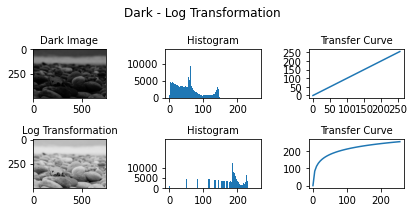

In [1]:
# Dark - Log Transformation
 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀入圖片
img_d = cv2.imread('dark.jpg', 0)
# 調整圖片大小
img_d = cv2.resize(img_d, None, fx = 0.5, fy = 0.5)
img_log_adjust = img_d.copy()

row, col = img_d.shape

# 決定c值
l_c = 255 / (np.log (1 + 255))
print(l_c)

# 將圖片進行對數變換
for i in range (0,row):
    for j in range (0,col):
        # Log Transformation
        img_log_adjust[i, j] = np.log(1 + img_log_adjust[i, j]) * l_c 

# 決定繪製子圖表的個數
plot_row = 3
plot_col = 3

# 設定子圖表
plt.subplot(plot_row, plot_col, 1)
# 設定子圖表的標題
plt.title('Dark Image', fontsize = 10)
# 顯示圖片
plt.imshow(cv2.cvtColor(img_d, cv2.COLOR_GRAY2RGB))

plt.subplot(plot_row, plot_col, 2)
plt.title('Histogram', fontsize = 10)
# 顯示直方圖
plt.hist(img_d.ravel(),256,[0,256])
# 設置y軸座標
plt.yticks([0, 5000, 10000])
# 設置x軸座標
plt.xticks([0,100, 200])

# 繪製轉換曲線
plt.subplot(plot_row, plot_col, 3)
plt.title('Transfer Curve', fontsize = 10)
x = np.linspace(0,255)
y = x
plt.plot(x, y)
plt.yticks([0, 50, 100, 150, 200, 250])
plt.xticks([0, 50, 100, 150, 200, 250])

plt.subplot(plot_row, plot_col, 4)
plt.title('Log Transformation', fontsize = 10)
plt.imshow(cv2.cvtColor(img_log_adjust, cv2.COLOR_GRAY2RGB))

plt.subplot(plot_row, plot_col, 5)
plt.title('Histogram', fontsize = 10)
plt.hist(img_log_adjust.ravel(),256,[0,256])
plt.yticks([0, 5000, 10000])
plt.xticks([0,100, 200])

# 繪製轉換曲線
plt.subplot(plot_row, plot_col, 6)
plt.title('Transfer Curve', fontsize = 10)
x = np.linspace(0,255)
l_y = np.log(1 + x) * l_c
plt.plot(x, l_y)
plt.xticks([0,100, 200])
plt.yticks([0,100, 200])

# 儲存圖片
cv2.imwrite('./dark/dark_gray.jpg', img_d)
cv2.imwrite('./dark/dark_log_transformation.jpg', cv2.cvtColor(img_log_adjust, cv2.COLOR_GRAY2BGR))

# 設置圖表標題
plt.suptitle('Dark - Log Transformation')
# 調整子圖表間距
plt.tight_layout()
# 儲存子圖表
plt.savefig('./dark/dark_log.jpg', dpi = 500)

45.98590442833571


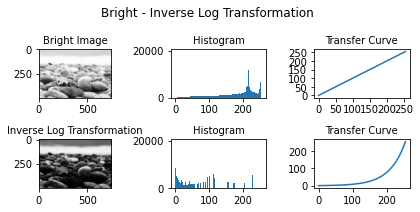

In [1]:
# Bright - Inverse Log Transformation

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀入圖片
img_b = cv2.imread('bright.jpg', 0)
# 調整圖片大小
img_b = cv2.resize(img_b, None, fx = 0.5, fy = 0.5)
img_log_adjust = img_b.copy()

row, col = img_b.shape

# 取得合適的c值
l_c = 255 / (np.log (1 + 255))
print(l_c)

# 將圖片進行逆對數變換
for i in range (0,row):
    for j in range (0,col):
        # Inverse Log Transformation
        img_log_adjust[i, j] = np.exp(img_log_adjust[i, j]**1/l_c)-1

# 決定繪製子圖表的個數
plot_row = 3
plot_col = 3

# 設定子圖表
plt.subplot(plot_row, plot_col, 1)
# 設定子圖表的標題
plt.title('Bright Image', fontsize = 10)
# 顯示圖片
plt.imshow(cv2.cvtColor(img_b, cv2.COLOR_GRAY2RGB))

plt.subplot(plot_row, plot_col, 2)
plt.title('Histogram', fontsize = 10)
# 顯示直方圖
plt.hist(img_b.ravel(),256,[0,256])
plt.xticks([0,100, 200])

# 繪製轉換曲線
plt.subplot(plot_row, plot_col, 3)
plt.title('Transfer Curve', fontsize = 10)
x = np.linspace(0,255)
y = x
plt.plot(x, y)
plt.yticks([0, 50, 100, 150, 200, 250])
plt.xticks([0, 50, 100, 150, 200, 250])

plt.subplot(plot_row, plot_col, 4)
plt.title('Inverse Log Transformation', fontsize = 10)
plt.imshow(cv2.cvtColor(img_log_adjust, cv2.COLOR_GRAY2RGB))

plt.subplot(plot_row, plot_col, 5)
plt.title('Histogram', fontsize = 10)
plt.hist(img_log_adjust.ravel(),256,[0,256])
plt.xticks([0,100, 200])

# 繪製轉換曲線
plt.subplot(plot_row, plot_col, 6)
plt.title('Transfer Curve', fontsize = 10)
x = np.linspace(0,255)
l_y = np.exp(x**1/l_c)-1
plt.plot(x, l_y)
plt.xticks([0,100, 200])
plt.yticks([0,100, 200])

# 儲存圖片
cv2.imwrite('./bright/bright_gray.jpg', img_b)
cv2.imwrite('./bright/bright_inv_log_transformation.jpg', cv2.cvtColor(img_log_adjust, cv2.COLOR_GRAY2BGR))

# 儲存子圖表
plt.suptitle('Bright - Inverse Log Transformation')
plt.tight_layout()
plt.savefig('./bright/bright_out.jpg', dpi = 500)